In [ ]:
import os
import functools
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [ ]:
N = 10
SEED = 1234
SCALE = 0.25

np.random.seed(SEED)

def true_fun(x):
  return np.sin(2 * np.pi * x)

def generate_noisy_data(x, scale=SCALE):
  y = true_fun(x) + np.random.normal(scale=scale, size=x.shape)
  return y

x_plot = np.arange(0, 1.01, 0.01)
y_plot = true_fun(x_plot)

# points with noise, will act as train data
x_train = np.linspace(0, 1, N)
y_train = generate_noisy_data(x_train)

In [ ]:
def transform_features(X, m):
  """ Create a polynomial of specified degrees """
  return PolynomialFeatures(degree=m).fit_transform(X.reshape(-1, 1))

In [ ]:
x_test = np.arange(0, 1.01, 0.01)
y_test = generate_noisy_data(x_test)

In [ ]:
features_train_m_9 = transform_features(x_train, m=9)
features_test_m_9 = transform_features(x_test, m=9)

In [ ]:
# values specified in figure 1.17

alpha = 5e-3
beta = 11.1

# First compute S (eq 1.72)
S_inv = alpha * np.eye(
            features_train_m_9.shape[1],
            features_train_m_9.shape[1]) +
            beta * (features_train_m_9.T @ features_train_m_9)

# posterior covariance matrix
S = np.linalg.inv(S_inv)
# posterior mean
mean = beta * S @ features_train_m_9.T @ y_train

In [ ]:
# The prediction on test data
#
# We here compute the mean and variance of each point
y_pred_mean = features_test_m_9 @ mean
y_pred_var = 1/beta + np.sum(features_test_m_9 @ S * features_test_m_9, axis=1)

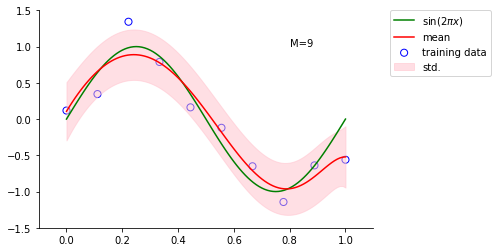

In [ ]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_plot, y_plot, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y_pred_mean, c="r", label="mean")
plt.fill_between(x_test, y_pred_mean - np.sqrt(y_pred_var), y_pred_mean + np.sqrt(y_pred_var), color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.);